In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/YoutubeCommentsDataSet.csv')

In [3]:
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [5]:
df.describe()

,Comment,Sentiment
count,18364,18408
unique,17871,3
top,one of the best thing about dude is that he ne...,positive
freq,10,11432


In [6]:
df.describe()

,Comment,Sentiment
count,18364,18408
unique,17871,3
top,one of the best thing about dude is that he ne...,positive
freq,10,11432


In [7]:
df.isnull().sum()

Comment      44
Sentiment     0
dtype: int64

In [8]:
df.corr

<bound method DataFrame.corr of                                                  Comment Sentiment
0      lets not forget that apple pay in 2014 require...   neutral
1      here in nz 50 of retailers don’t even have con...  negative
2      i will forever acknowledge this channel with t...  positive
3      whenever i go to a place that doesn’t take app...  negative
4      apple pay is so convenient secure and easy to ...  positive
...                                                  ...       ...
18403  i really like the point about engineering tool...  positive
18404  i’ve just started exploring this field and thi...  positive
18405  excelente video con una pregunta filosófica pr...   neutral
18406  hey daniel just discovered your channel a coup...  positive
18407  this is great focus is key a playful approach ...  positive

[18408 rows x 2 columns]>

In [9]:
df["Comment"] = df["Comment"].astype(str)

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text) 
    text = re.sub(r"\d+", "", text)  
    words = text.split()
    words = [word for word in words if word not in stop_words]  
    return " ".join(words)

df["cleaned_comment"] = df["Comment"].apply(clean_text)

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
from wordcloud import WordCloud
from collections import Counter

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/YoutubeCommentsDataSet.csv')

df.head()

df.info()

df.describe()

df.isnull().sum()

df.corr

df["Comment"] = df["Comment"].astype(str)

import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text) 
    text = re.sub(r"\d+", "", text)  
    words = text.split()
    words = [word for word in words if word not in stop_words]  
    return " ".join(words)

df["cleaned_comment"] = df["Comment"].apply(clean_text)

df.isnull().sum()

df.columns

from wordcloud import WordCloud
from collections import Counter



plt.figure(figsize=(7, 5))
sns.countplot(x=df["Sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Word Cloud for Most Frequent Words
all_words = " ".join(df["cleaned_comment"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Comments")
plt.show()

# Sentiment-wise Most Frequent Words
plt.figure(figsize=(12, 6))
for sentiment in df["Sentiment"].unique():
    words = " ".join(df[df["Sentiment"] == sentiment]["cleaned_comment"])
    most_common = Counter(words.split()).most_common(10)
    words, counts = zip(*most_common)
    
    plt.barh(words, counts, label=sentiment)

plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Most Frequent Words per Sentiment")
plt.show()

# Comment Length vs. Sentiment
df["comment_length"] = df["cleaned_comment"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Sentiment"], y=df["comment_length"], palette="coolwarm")
plt.title("Comment Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Words")
plt.show()

#ML Model 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["cleaned_comment"])
y = df["Sentiment"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(kernel='linear')
}

from sklearn.metrics import accuracy_score, classification_report

best_model = None
best_accuracy = 0
best_model_name = ""
results = {}

print("\nModel Performance Summary:\n" + "-"*30)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"{name}: Accuracy = {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

# Display best model
print("\nBest Model:")
print(f"{best_model_name} with Accuracy: {best_accuracy:.4f}")

model_names = list(results.keys())
accuracies = [acc * 100 for acc in results.values()]

plt.figure(figsize=(8, 5))
sns.barplot(x=accuracies, y=model_names, palette="coolwarm")

for index, value in enumerate(accuracies):
    plt.text(value + 0.5, index, f"{value:.2f}%", va="center", fontsize=12)

plt.xlabel("Accuracy (%)")
plt.ylabel("Models")
plt.title("Model Performance Comparison")
plt.xlim(0, 100)  
plt.show()

# *BERT model***

In [10]:
! pip install transformers torch pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 25.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 2.9 MB/s eta 0:00:00:00:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-10.3

In [12]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
#from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. Load the Dataset
df = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/YoutubeCommentsDataSet.csv')

# Drop any rows with missing comments, if any
df = df.dropna(subset=['Comment', 'Sentiment'])

# Map sentiment labels to integers
# NOTE: Make sure your sentiment labels are consistent. Let's assume you have 'Positive', 'Negative', and 'Neutral'.
# We will create a mapping from label name to integer.
possible_labels = df.Sentiment.unique()
label_dict = {label: i for i, label in enumerate(possible_labels)}
df['label'] = df.Sentiment.replace(label_dict)

# 2. Split the data
X_train, X_val, y_train, y_val = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.2,
    random_state=42,
    stratify=df.label.values # Ensures balanced split
)

df['data_type'] = ['not_set'] * df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

# 3. Load BERT Tokenizer and Model
MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=len(label_dict),
    output_attentions=False,
    output_hidden_states=False,
)
model.to(device) # Move model to GPU if available

# 4. Create a PyTorch Custom Dataset
class YoutubeCommentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 5. Create DataLoaders
BATCH_SIZE = 16

train_dataset = YoutubeCommentDataset(
    texts=df[df.data_type == 'train'].Comment.values,
    labels=df[df.data_type == 'train'].label.values,
    tokenizer=tokenizer
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_dataset = YoutubeCommentDataset(
    texts=df[df.data_type == 'val'].Comment.values,
    labels=df[df.data_type == 'val'].label.values,
    tokenizer=tokenizer
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE
)


# 6. Set up Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
EPOCHS = 3
total_steps = len(train_dataloader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# 7. Training Loop
def train_epoch(model, data_loader, optimizer, device, scheduler):
    model.train()
    total_loss = 0
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return total_loss / len(data_loader)

# 8. Evaluation Loop
def eval_model(model, data_loader, device):
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).flatten()
            
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
            
    return accuracy_score(true_labels, predictions), classification_report(true_labels, predictions, target_names=list(label_dict.keys()))

# 9. Run Training and Evaluation
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_loss = train_epoch(
        model,
        train_dataloader,
        optimizer,
        device,
        scheduler
    )
    print(f'Train loss {train_loss}')

    val_acc, report = eval_model(
        model,
        val_dataloader,
        device
    )
    print(f'Validation Accuracy: {val_acc}')
    print(report)

print("\n--- Training Complete ---")

# To make a prediction on a new sentence
# sentence = "This video was absolutely amazing!"
# encoded_review = tokenizer.encode_plus(
#     sentence,
#     max_length=128,
#     add_special_tokens=True,
#     return_token_type_ids=False,
#     padding='max_length',
#     return_attention_mask=True,
#     return_tensors='pt',
#     truncation=True
# )

# input_ids = encoded_review['input_ids'].to(device)
# attention_mask = encoded_review['attention_mask'].to(device)

# with torch.no_grad():
#     outputs = model(input_ids, attention_mask)
#     prediction = torch.argmax(outputs.logits, dim=1).item()

# print(f"Sentence: '{sentence}'")
# print(f"Predicted sentiment: {list(label_dict.keys())[prediction]}")

Using device: cuda


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
----------
Train loss 0.4455430318314635
Validation Accuracy: 0.8532534712768853
              precision    recall  f1-score   support

     neutral       0.72      0.77      0.75       925
    negative       0.81      0.67      0.74       467
    positive       0.92      0.92      0.92      2281

    accuracy                           0.85      3673
   macro avg       0.82      0.79      0.80      3673
weighted avg       0.85      0.85      0.85      3673

Epoch 2/3
----------
Train loss 0.23396273004144463
Validation Accuracy: 0.8567928124149197
              precision    recall  f1-score   support

     neutral       0.76      0.71      0.73       925
    negative       0.76      0.78      0.77       467
    positive       0.91      0.93      0.92      2281

    accuracy                           0.86      3673
   macro avg       0.81      0.81      0.81      3673
weighted avg       0.85      0.86      0.86      3673

Epoch 3/3
----------
Train loss 0.1286829916547003
Vali

2025-07-04 13:49:08.063008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751636948.555566      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751636948.676490      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_35/239901733.py:71: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df.Sentiment.replace(label_dict)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
--------------------
Train loss 0.4601 | Train accuracy 0.8107
Val loss 0.3689 | Val accuracy 0.8462

Epoch 2/10
--------------------
Train loss 0.2514 | Train accuracy 0.9067
Val loss 0.4510 | Val accuracy 0.8513

Epoch 3/10
--------------------
Train loss 0.1552 | Train accuracy 0.9513
Val loss 0.5832 | Val accuracy 0.8535

Epoch 4/10
--------------------
Train loss 0.0989 | Train accuracy 0.9725
Val loss 0.7248 | Val accuracy 0.8535

Epoch 5/10
--------------------
Train loss 0.0604 | Train accuracy 0.9839
Val loss 0.8932 | Val accuracy 0.8533

Epoch 6/10
--------------------
Train loss 0.0391 | Train accuracy 0.9906
Val loss 0.9901 | Val accuracy 0.8527

Epoch 7/10
--------------------
Train loss 0.0260 | Train accuracy 0.9938
Val loss 1.0276 | Val accuracy 0.8503

Epoch 8/10
--------------------
Train loss 0.0142 | Train accuracy 0.9967
Val loss 1.1134 | Val accuracy 0.8522

Epoch 9/10
--------------------
Train loss 0.0075 | Train accuracy 0.9980
Val loss 1.1865 | Val 

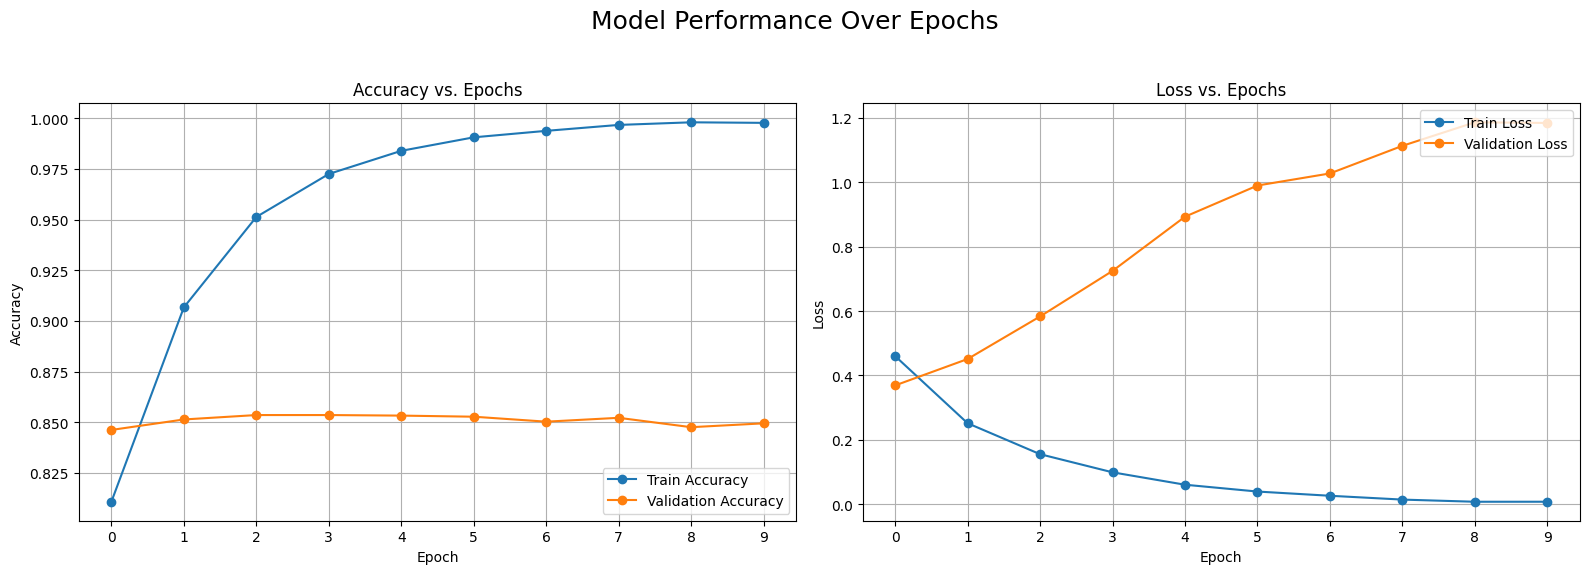


Generating Confusion Matrix plot...


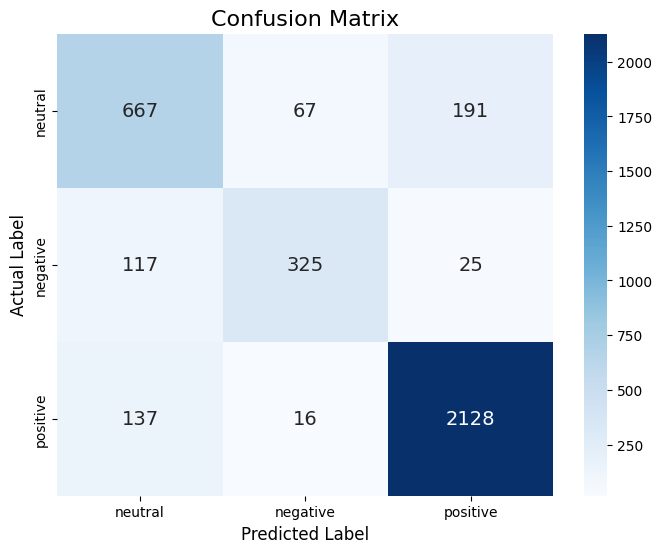

In [1]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Plotting Functions ---

def plot_training_history(history):
    """
    This function plots the model's accuracy and loss metrics
    for both the training and validation sets over the epochs.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Model Performance Over Epochs', fontsize=18)

    # --- Subplot 1: Model Accuracy ---
    ax1.plot(history['train_acc'], 'o-', label='Train Accuracy')
    ax1.plot(history['val_acc'], 'o-', label='Validation Accuracy')
    ax1.set_title('Accuracy vs. Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_xticks(range(len(history['train_acc'])))
    ax1.legend(loc='lower right')
    ax1.grid(True)

    # --- Subplot 2: Model Loss ---
    ax2.plot(history['train_loss'], 'o-', label='Train Loss')
    ax2.plot(history['val_loss'], 'o-', label='Validation Loss')
    ax2.set_title('Loss vs. Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_xticks(range(len(history['train_loss'])))
    ax2.legend(loc='upper right')
    ax2.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    This function computes and plots a confusion matrix using a heatmap
    for clear visualization of the model's classification performance.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                annot_kws={"size": 14})
    plt.title('Confusion Matrix', fontsize=16)
    plt.ylabel('Actual Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.show()

# --- 2. Model Training and Evaluation Setup ---

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and Prepare the Dataset
df = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/YoutubeCommentsDataSet.csv')
df.dropna(subset=['Comment', 'Sentiment'], inplace=True)

possible_labels = df.Sentiment.unique()
label_dict = {label: i for i, label in enumerate(possible_labels)}
df['label'] = df.Sentiment.replace(label_dict)
class_names = list(label_dict.keys())

# Split Data
X_train, X_val, y_train, y_val = train_test_split(
    df.index.values, df.label.values,
    test_size=0.20, random_state=42, stratify=df.label.values
)
df['data_type'] = 'not_set'
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

# Load BERT Tokenizer and Model
MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME, do_lower_case=True)
model = BertForSequenceClassification.from_pretrained(
    MODEL_NAME, num_labels=len(label_dict)
)
model.to(device)

# Custom PyTorch Dataset
class CommentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text, add_special_tokens=True, max_length=self.max_len,
            return_token_type_ids=False, padding='max_length',
            return_attention_mask=True, return_tensors='pt', truncation=True
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# DataLoaders
BATCH_SIZE = 16
train_dataset = CommentDataset(
    texts=df[df.data_type == 'train'].Comment.values,
    labels=df[df.data_type == 'train'].label.values, tokenizer=tokenizer
)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataset = CommentDataset(
    texts=df[df.data_type == 'val'].Comment.values,
    labels=df[df.data_type == 'val'].label.values, tokenizer=tokenizer
)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
EPOCHS = 10
total_steps = len(train_dataloader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=0, num_training_steps=total_steps
)

# --- 3. Training and Evaluation Functions ---

def train_model_epoch(model, data_loader, optimizer, device, scheduler):
    model.train()
    total_loss, total_accuracy = 0, 0
    for batch in data_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        model.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).flatten()
        total_accuracy += accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    return total_loss / len(data_loader), total_accuracy / len(data_loader)

def evaluate_model(model, data_loader, device):
    model.eval()
    predictions, true_labels = [], []
    total_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).flatten()
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    avg_loss = total_loss / len(data_loader)
    accuracy = accuracy_score(true_labels, predictions)
    return avg_loss, accuracy, true_labels, predictions

# --- 4. Run Training and Generate Plots ---

history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 20)
    train_loss, train_acc = train_model_epoch(model, train_dataloader, optimizer, device, scheduler)
    print(f'Train loss {train_loss:.4f} | Train accuracy {train_acc:.4f}')
    val_loss, val_acc, y_true, y_pred = evaluate_model(model, val_dataloader, device)
    print(f'Val loss {val_loss:.4f} | Val accuracy {val_acc:.4f}\n')
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

print("--- Training Complete ---")

# Generate and Display the Figures
print("\nGenerating Training History plot (Accuracy & Loss vs. Epochs)...")
plot_training_history(history)

print("\nGenerating Confusion Matrix plot...")
plot_confusion_matrix(y_true, y_pred, class_names)


/tmp/ipykernel_35/2448711194.py:72: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df.Sentiment.replace(label_dict)
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
--------------------
Train loss 0.4590 | Train accuracy 0.8043
Val loss 0.3827 | Val accuracy 0.8421

Epoch 2/10
--------------------
Train loss 0.2662 | Train accuracy 0.8962
Val loss 0.3915 | Val accuracy 0.8481

Epoch 3/10
--------------------
Train loss 0.1613 | Train accuracy 0.9446
Val loss 0.5632 | Val accuracy 0.8492

Epoch 4/10
--------------------
Train loss 0.1100 | Train accuracy 0.9671
Val loss 0.7864 | Val accuracy 0.8440

Epoch 5/10
--------------------
Train loss 0.0723 | Train accuracy 0.9799
Val loss 0.9381 | Val accuracy 0.8391

Epoch 6/10
--------------------
Train loss 0.0491 | Train accuracy 0.9878
Val loss 0.9896 | Val accuracy 0.8415

Epoch 7/10
--------------------
Train loss 0.0323 | Train accuracy 0.9922
Val loss 1.0794 | Val accuracy 0.8415

Epoch 8/10
--------------------
Train loss 0.0178 | Train accuracy 0.9954
Val loss 1.1221 | Val accuracy 0.8462

Epoch 9/10
--------------------
Train loss 0.0156 | Train accuracy 0.9959
Val loss 1.1165 | Val 

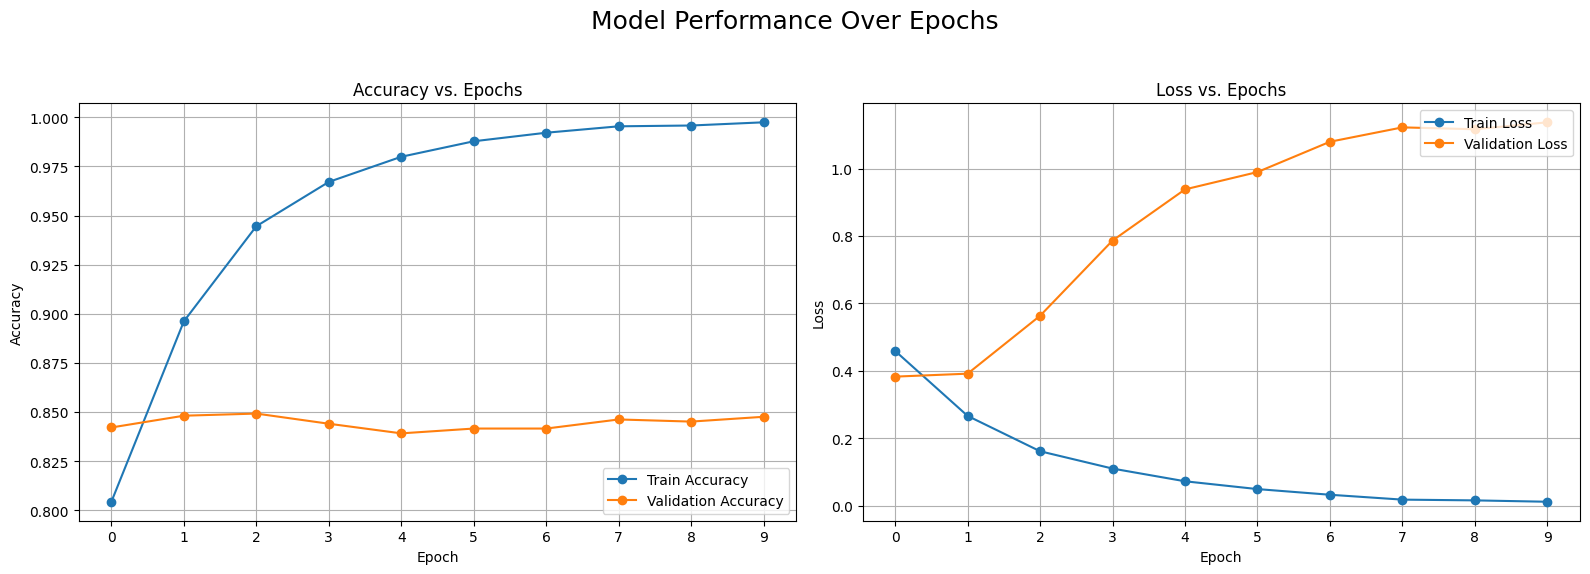


Generating Confusion Matrix plot...


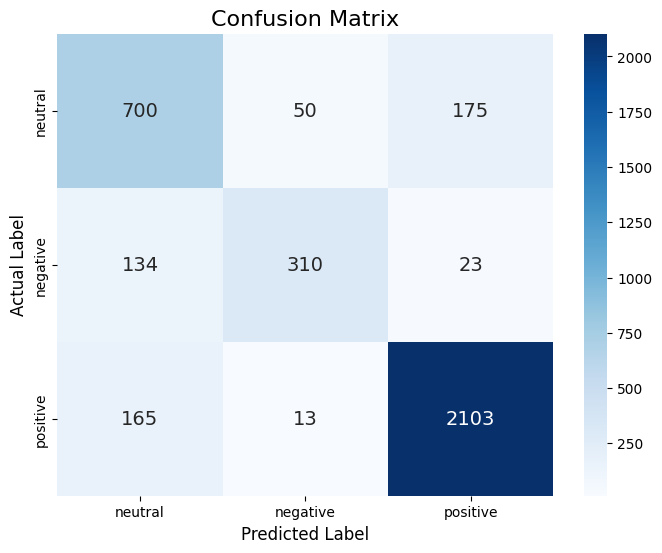

In [3]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
# --- Changed from BERT to DistilBERT ---
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, get_linear_schedule_with_warmup
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Plotting Functions (No changes needed) ---

def plot_training_history(history):
    """
    This function plots the model's accuracy and loss metrics
    for both the training and validation sets over the epochs.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Model Performance Over Epochs', fontsize=18)

    # --- Subplot 1: Model Accuracy ---
    ax1.plot(history['train_acc'], 'o-', label='Train Accuracy')
    ax1.plot(history['val_acc'], 'o-', label='Validation Accuracy')
    ax1.set_title('Accuracy vs. Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_xticks(range(len(history['train_acc'])))
    ax1.legend(loc='lower right')
    ax1.grid(True)

    # --- Subplot 2: Model Loss ---
    ax2.plot(history['train_loss'], 'o-', label='Train Loss')
    ax2.plot(history['val_loss'], 'o-', label='Validation Loss')
    ax2.set_title('Loss vs. Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_xticks(range(len(history['train_loss'])))
    ax2.legend(loc='upper right')
    ax2.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    This function computes and plots a confusion matrix using a heatmap
    for clear visualization of the model's classification performance.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                annot_kws={"size": 14})
    plt.title('Confusion Matrix', fontsize=16)
    plt.ylabel('Actual Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.show()

# --- 2. Model Training and Evaluation Setup ---

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and Prepare the Dataset
df = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/YoutubeCommentsDataSet.csv')
df.dropna(subset=['Comment', 'Sentiment'], inplace=True)

possible_labels = df.Sentiment.unique()
label_dict = {label: i for i, label in enumerate(possible_labels)}
df['label'] = df.Sentiment.replace(label_dict)
class_names = list(label_dict.keys())

# Split Data
X_train, X_val, y_train, y_val = train_test_split(
    df.index.values, df.label.values,
    test_size=0.20, random_state=42, stratify=df.label.values
)
df['data_type'] = 'not_set'
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

# --- Changed from BERT to DistilBERT ---
MODEL_NAME = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME, do_lower_case=True)
model = DistilBertForSequenceClassification.from_pretrained(
    MODEL_NAME, num_labels=len(label_dict)
)
model.to(device)

# Custom PyTorch Dataset (No changes needed)
class CommentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text, add_special_tokens=True, max_length=self.max_len,
            return_token_type_ids=False, padding='max_length',
            return_attention_mask=True, return_tensors='pt', truncation=True
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# DataLoaders
BATCH_SIZE = 16
train_dataset = CommentDataset(
    texts=df[df.data_type == 'train'].Comment.values,
    labels=df[df.data_type == 'train'].label.values, tokenizer=tokenizer
)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataset = CommentDataset(
    texts=df[df.data_type == 'val'].Comment.values,
    labels=df[df.data_type == 'val'].label.values, tokenizer=tokenizer
)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
EPOCHS = 10
total_steps = len(train_dataloader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=0, num_training_steps=total_steps
)

# --- 3. Training and Evaluation Functions (No changes needed) ---

def train_model_epoch(model, data_loader, optimizer, device, scheduler):
    model.train()
    total_loss, total_accuracy = 0, 0
    for batch in data_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        model.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).flatten()
        total_accuracy += accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    return total_loss / len(data_loader), total_accuracy / len(data_loader)

def evaluate_model(model, data_loader, device):
    model.eval()
    predictions, true_labels = [], []
    total_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).flatten()
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    avg_loss = total_loss / len(data_loader)
    accuracy = accuracy_score(true_labels, predictions)
    return avg_loss, accuracy, true_labels, predictions

# --- 4. Run Training and Generate Plots ---

history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 20)
    train_loss, train_acc = train_model_epoch(model, train_dataloader, optimizer, device, scheduler)
    print(f'Train loss {train_loss:.4f} | Train accuracy {train_acc:.4f}')
    val_loss, val_acc, y_true, y_pred = evaluate_model(model, val_dataloader, device)
    print(f'Val loss {val_loss:.4f} | Val accuracy {val_acc:.4f}\n')
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

print("--- Training Complete ---")

# Generate and Display the Figures
print("\nGenerating Training History plot (Accuracy & Loss vs. Epochs)...")
plot_training_history(history)

print("\nGenerating Confusion Matrix plot...")
plot_confusion_matrix(y_true, y_pred, class_names)

